In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
pd.options.display.float_format = '{:.2f}'.format

from itertools import combinations
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA as ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [6]:
data = pd.read_csv('AirPassengers.csv')
data.head()


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
data.shape, data.columns, data.info(), data.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


((144, 2),
 Index(['Month', '#Passengers'], dtype='object'),
 None,
 <bound method NDFrame.describe of        Month  #Passengers
 0    1949-01          112
 1    1949-02          118
 2    1949-03          132
 3    1949-04          129
 4    1949-05          121
 ..       ...          ...
 139  1960-08          606
 140  1960-09          508
 141  1960-10          461
 142  1960-11          390
 143  1960-12          432
 
 [144 rows x 2 columns]>)

In [10]:
data['Date'] = pd.to_datetime(data['Month'])
data = data.drop(columns = 'Month')
data = data.set_index('Date')
data = data.rename(columns = {'#Passengers':'Passengers'})
data.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Date'>

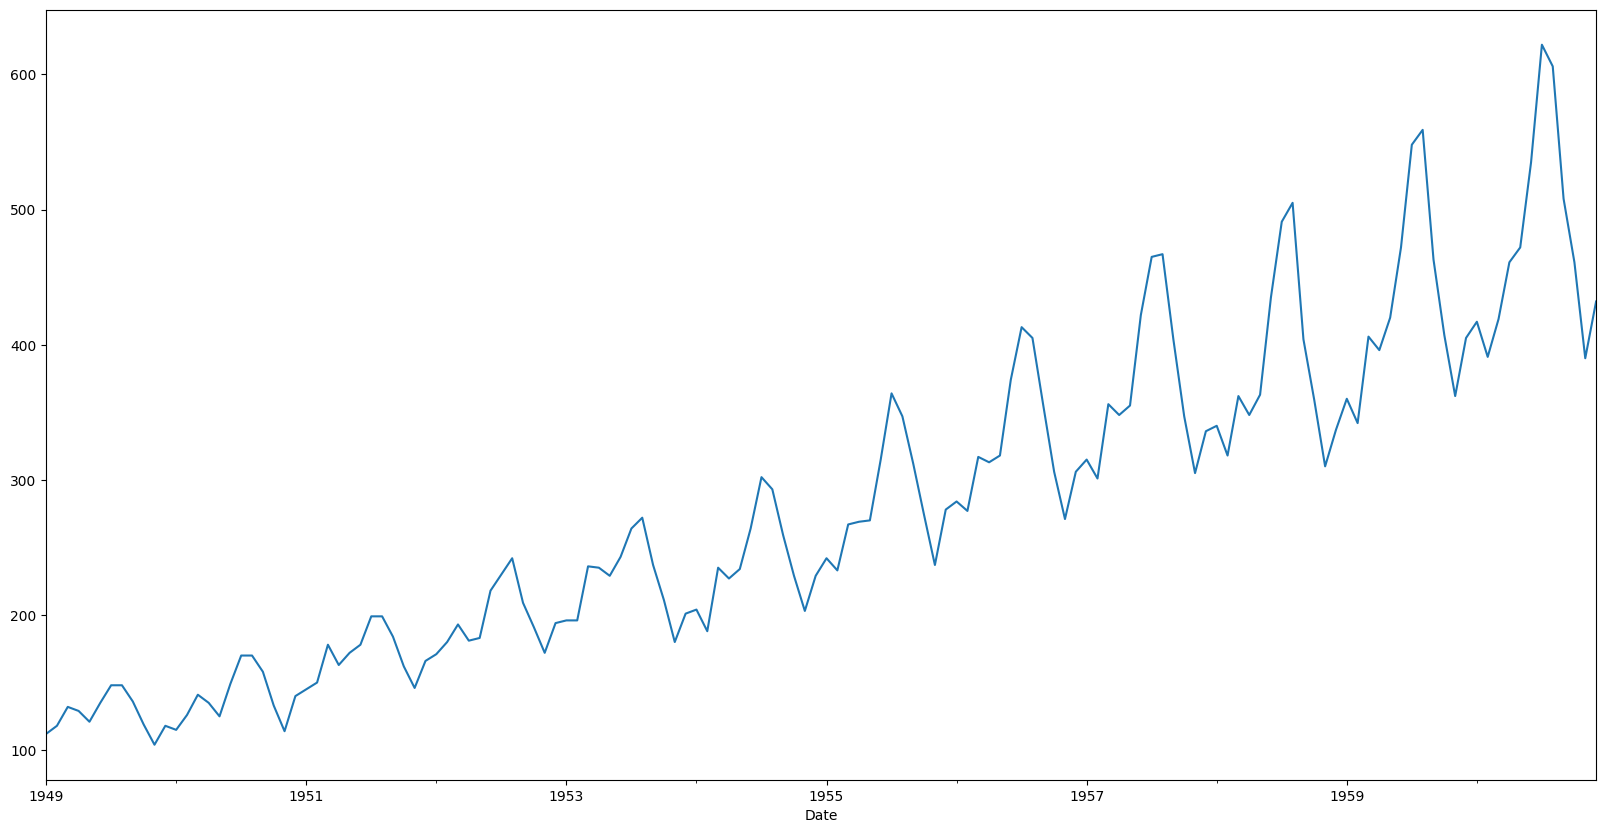

In [ ]:
plt.figure(figsize =(20,10))
data['Passengers'].plot()

**From the above graph of Passengers data, we can say that it represents a Multiplicative Model as the data has increasing width and height of the peaks**

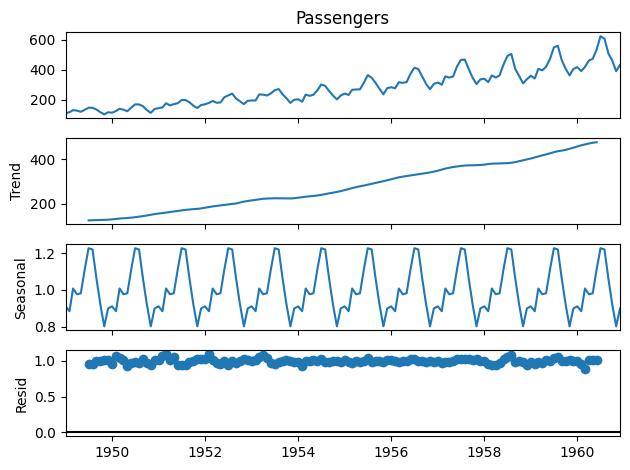

In [15]:
dec = sm.tsa.seasonal_decompose(data['Passengers'],period = 12, model = 'multiplicative').plot()
plt.show()

**Data clearly has a linear uptrend. A clear cut seasonal pattern of 1 uear duration is present in the data.**

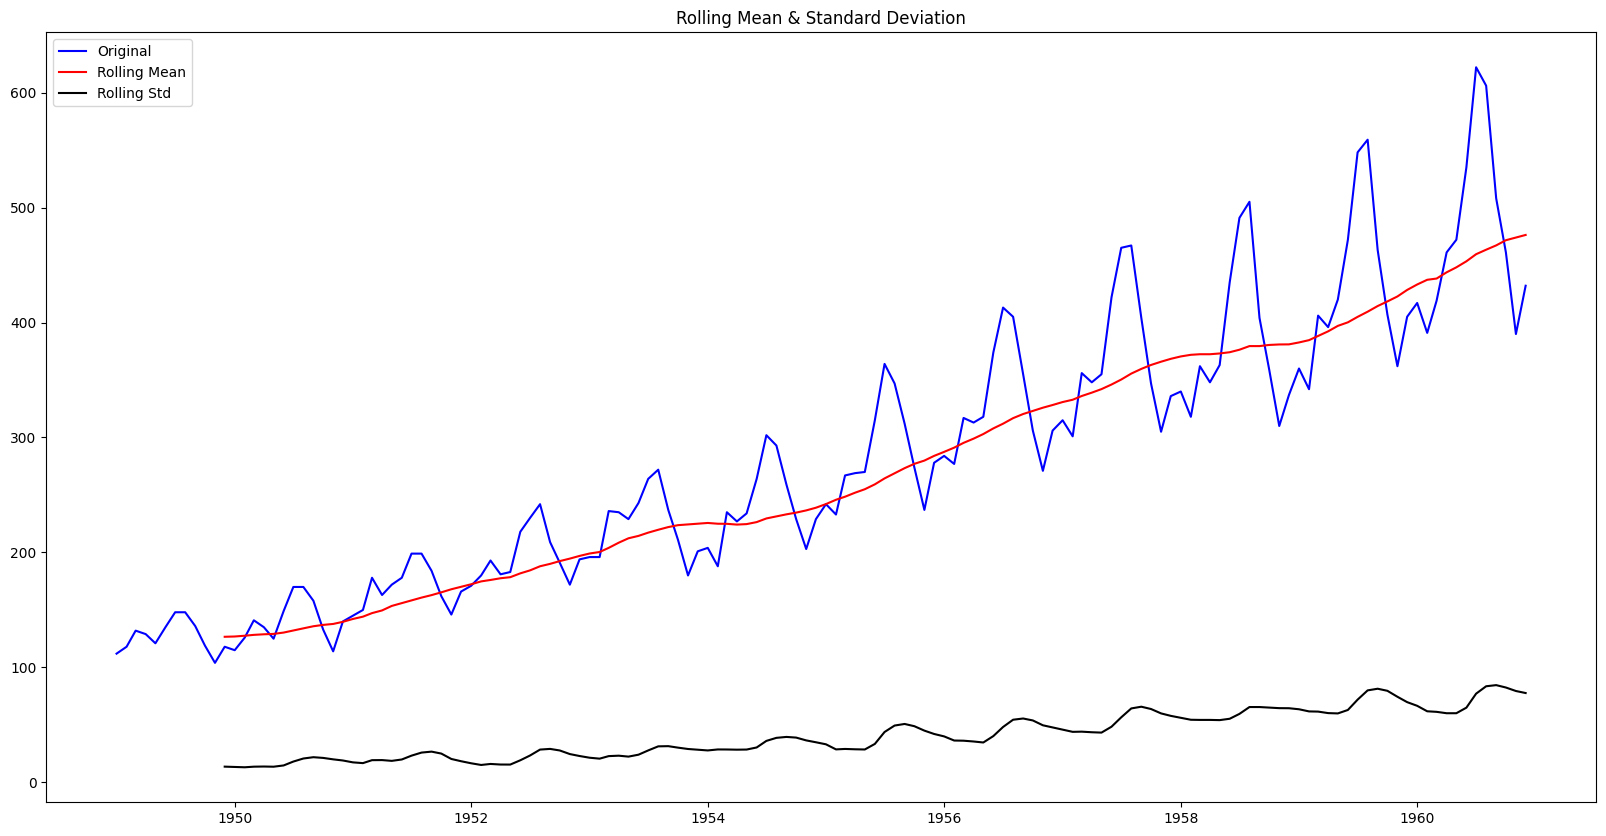

Results of Dickey-Fuller Test:
Test Statistic                  0.82
p-value                         0.99
#Lags Used                     13.00
Number of Observations Used   130.00
Critical Value (1%)            -3.48
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64


In [16]:

MA = data['Passengers'].rolling(window=12).mean()
MSTD = data['Passengers'].rolling(window=12).std()

#Plot rolling statistics:
plt.figure(figsize=(20,10))
orig = plt.plot(data['Passengers'], color='blue',label='Original')
mean = plt.plot(MA, color='red', label='Rolling Mean')
std = plt.plot(MSTD, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(data['Passengers'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

**Rolling Mean is clearly variable with time. Rolling Standard Deviation has some crests - troughs that bary according to the time.**
**Test Statistic: (0.82) > Critical Value (5%): (-2.88)**
**P-value: (0.99) > 0.05**
**Null-hypothesis cannot be rejected - Passenger time series is not stationary.**

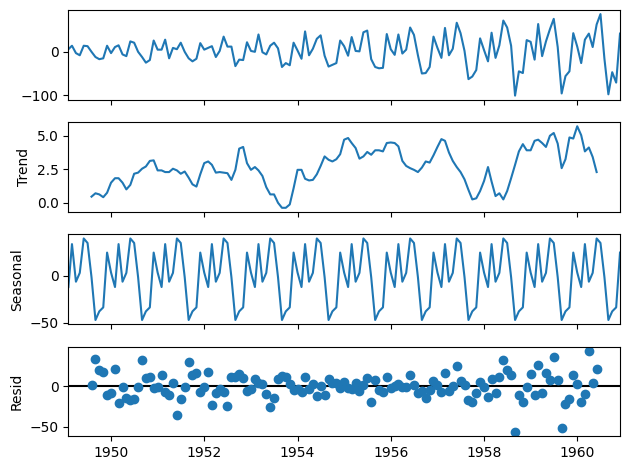

In [17]:
data_diff = data.diff()
data_diff = data_diff.dropna()

dec = sm.tsa.seasonal_decompose(data_diff,period = 12).plot()
plt.show()

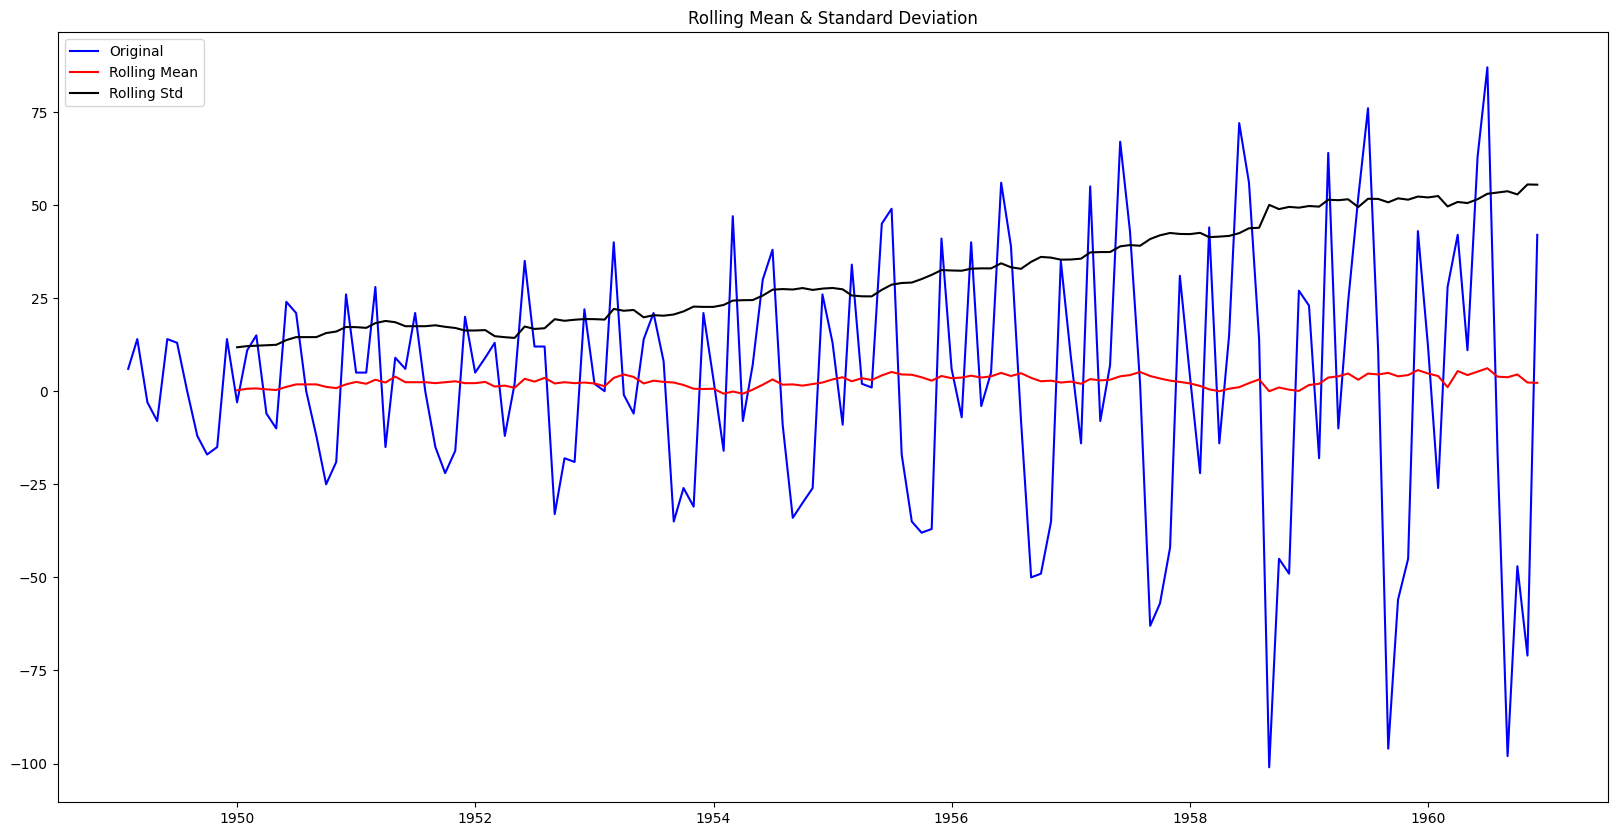

Results of Dickey-Fuller Test:
Test Statistic                 -2.83
p-value                         0.05
#Lags Used                     12.00
Number of Observations Used   130.00
Critical Value (1%)            -3.48
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64


In [18]:
MA = data_diff.rolling(window=12).mean()
MSTD = data_diff.rolling(window=12).std()

#Plot rolling statistics:
plt.figure(figsize=(20,10))
orig = plt.plot(data_diff, color='blue',label='Original')
mean = plt.plot(MA, color='red', label='Rolling Mean')
std = plt.plot(MSTD, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(data_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

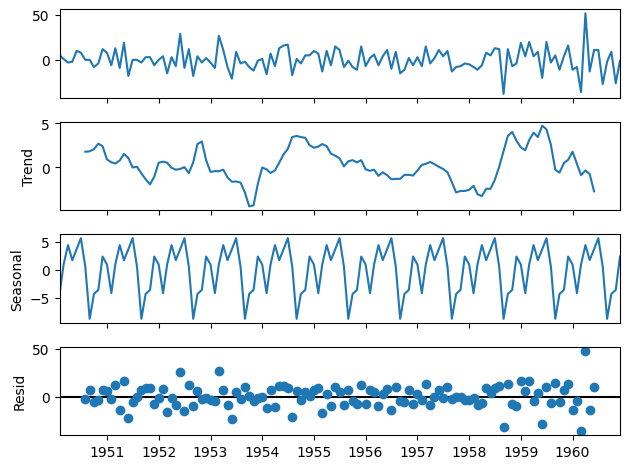

In [19]:
data_diff_seas = data_diff.diff(12)
data_diff_seas = data_diff_seas.dropna()
dec = sm.tsa.seasonal_decompose(data_diff_seas,period = 12)
dec.plot()
plt.show()

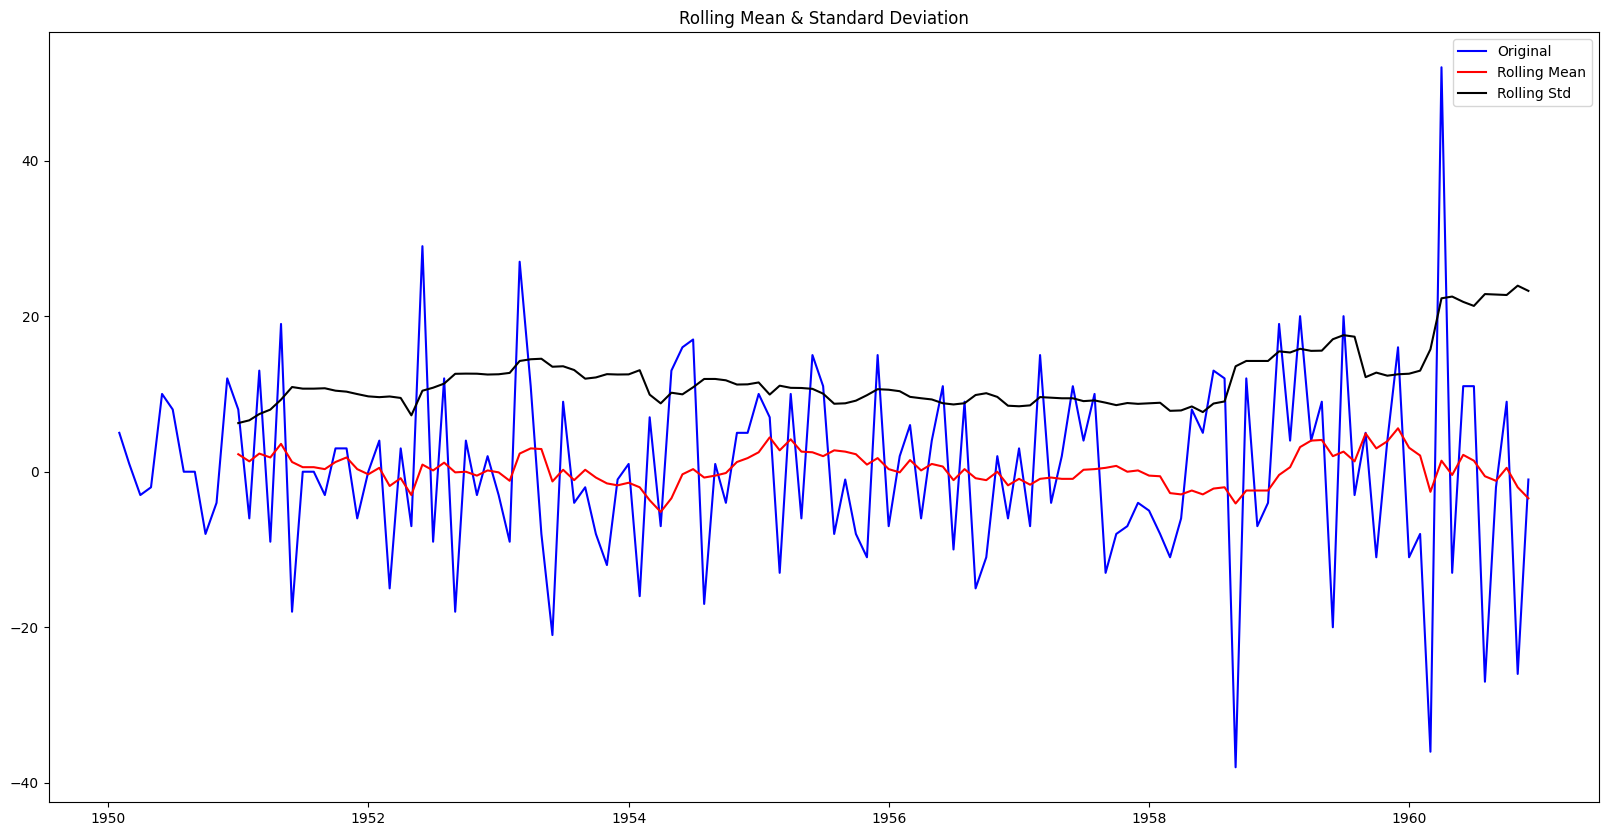

Results of Dickey-Fuller Test:
Test Statistic                -15.60
p-value                         0.00
#Lags Used                      0.00
Number of Observations Used   130.00
Critical Value (1%)            -3.48
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64


In [20]:
MA = data_diff_seas['Passengers'].rolling(window=12).mean()
MSTD = data_diff_seas['Passengers'].rolling(window=12).std()

#Plot rolling statistics:
plt.figure(figsize=(20,10))
orig = plt.plot(data_diff_seas['Passengers'], color='blue',label='Original')
mean = plt.plot(MA, color='red', label='Rolling Mean')
std = plt.plot(MSTD, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(data_diff_seas['Passengers'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

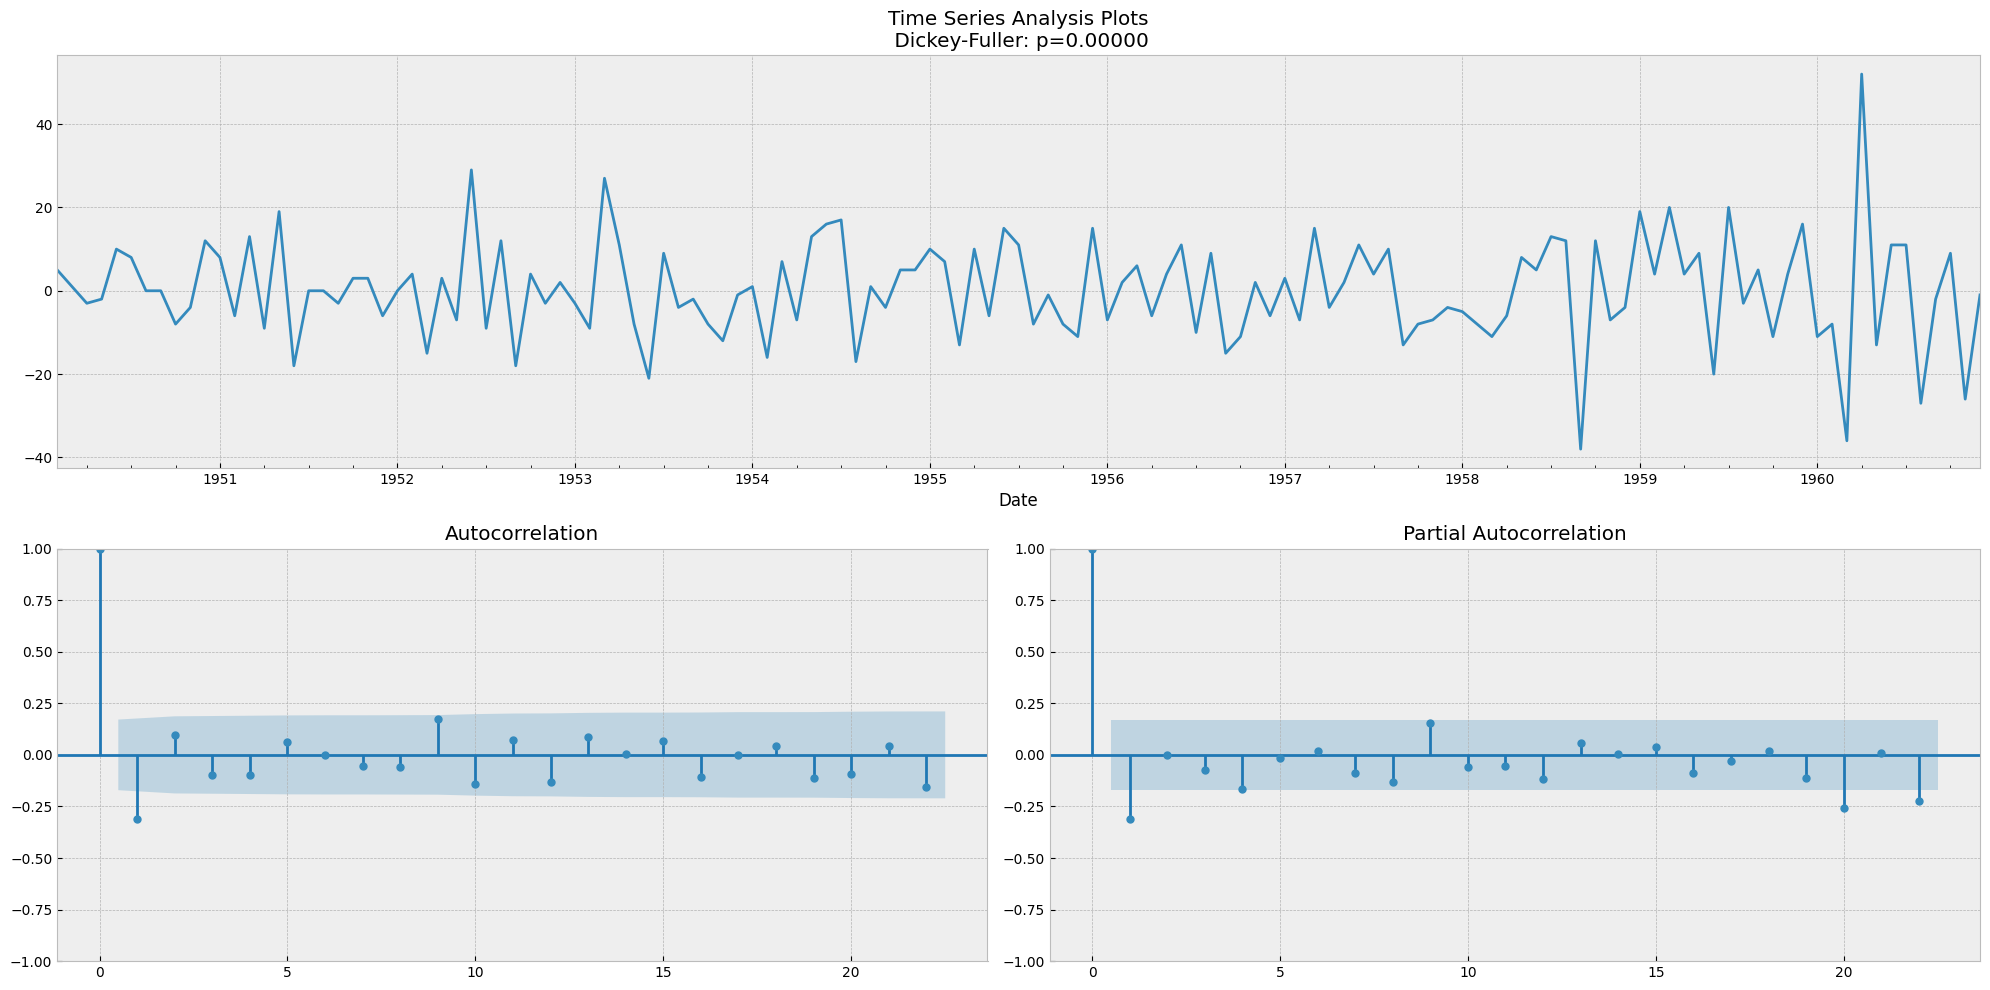

In [25]:
if not isinstance(data_diff_seas['Passengers'], pd.Series):
        data_diff_seas['Passengers'] = pd.Series()
        
with plt.style.context('bmh'):    
    fig = plt.figure(figsize=(20, 10))
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
        
    data_diff_seas['Passengers'].plot(ax=ts_ax)
    p_value = sm.tsa.stattools.adfuller(data_diff_seas['Passengers'])[1]
    ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
    smt.graphics.plot_acf(data_diff_seas['Passengers'], lags=None, ax=acf_ax)
    smt.graphics.plot_pacf(data_diff_seas['Passengers'], lags=None, ax=pacf_ax)
    plt.tight_layout()

**For the SARIMA model, order of (p,d,q) will be same as the order of the ARIMA model above. \n For (P,D,Q,M): P=0, D=1, Q=1, M=12**

In [27]:
model = sm.tsa.statespace.SARIMAX(data['Passengers'],order = (2,1,2),seasonal_order = (0,1,1,12))
model_fit = model.fit()

model_fit.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52286D+00    |proj g|=  8.40730D-02

At iterate    5    f=  3.51094D+00    |proj g|=  1.10231D-02

At iterate   10    f=  3.50236D+00    |proj g|=  2.04172D-02

At iterate   15    f=  3.50094D+00    |proj g|=  7.95686D-03

At iterate   20    f=  3.49979D+00    |proj g|=  1.10264D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     29      1     0     0   2.602D-05   3.500D+00
  F =   3.4997746156044105     

CONVERG

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -503.968
Date:                              Sat, 08 Mar 2025   AIC                           1019.935
Time:                                      19:20:09   BIC                           1037.186
Sample:                                  01-01-1949   HQIC                          1026.945
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3966      0.422      0.940      0.347      -0.430       1.223
ar.L2          0.3538      0.317      1.115      0.265      -0.268       0.976
ma.L1         -0.7648      0.432     -1.769      0.077      -1.612       0.083
ma.L2         -0.2060      0.414     -0.497      0.619      -1.018       0.606
ma.S.L12      -0.1033      0.112     -0.921      0.357      -0.323       0.117
sigma2       127.2934     14.232      8.944      0.000      99.400     155.187
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                11.10
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               2.57   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
size = int(len(data) - 30)
train, test = data['Passengers'][0:size], data['Passengers'][size:len(data)]

print('\t SARIMA MODEL : In - Sample Forecasting \n')

history = [x for x in train]
predictions = []

for t in range(len(test)):
    
    model = sm.tsa.statespace.SARIMAX(history,order = (2,1,2),seasonal_order = (0,1,1,12))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    
    yhat = output[0]
    predictions.append(float(yhat))
    
    obs = test[t]
    history.append(obs)
    
    print('predicted = %f, expected = %f' % (yhat, obs))

	 SARIMA MODEL : In - Sample Forecasting 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24773D+00    |proj g|=  3.85280D-02

At iterate    5    f=  3.24330D+00    |proj g|=  3.92157D-02

At iterate   10    f=  3.23721D+00    |proj g|=  1.66594D-02

At iterate   15    f=  3.22917D+00    |proj g|=  4.75928D-03


 This problem is unconstrained.



At iterate   20    f=  3.22880D+00    |proj g|=  1.37446D-03

At iterate   25    f=  3.22866D+00    |proj g|=  3.95146D-04

At iterate   30    f=  3.22865D+00    |proj g|=  1.69603D-04

At iterate   35    f=  3.22864D+00    |proj g|=  3.39559D-05

At iterate   40    f=  3.22864D+00    |proj g|=  1.69853D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     45      1     0     0   3.199D-05   3.229D+00
  F =   3.2286437942646504     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 479.085284, expected = 491.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.

/var/folders/2v/t8ll2w9151nf9h3myq7ks4xh0000gn/T/ipykernel_31029/1910389245.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]
 This problem is unconstrained.



At iterate   15    f=  3.23498D+00    |proj g|=  6.62059D-03

At iterate   20    f=  3.23476D+00    |proj g|=  5.43467D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     27      1     0     0   4.493D-06   3.235D+00
  F =   3.2347276386667239     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 490.553509, expected = 505.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.26728D+00    |proj g|=  3.67042D-02

At iterate    5    f=  

 This problem is unconstrained.



At iterate   10    f=  3.25422D+00    |proj g|=  1.27227D-02

At iterate   15    f=  3.24525D+00    |proj g|=  2.70681D-02

At iterate   20    f=  3.24404D+00    |proj g|=  1.79272D-03

At iterate   25    f=  3.24403D+00    |proj g|=  6.74851D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     29      1     0     0   6.749D-06   3.244D+00
  F =   3.2440327648833640     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 441.276125, expected = 404.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         

 This problem is unconstrained.



At iterate   20    f=  3.30582D+00    |proj g|=  9.57809D-04

At iterate   25    f=  3.30573D+00    |proj g|=  6.14050D-04

At iterate   30    f=  3.30569D+00    |proj g|=  9.22546D-04

At iterate   35    f=  3.30568D+00    |proj g|=  3.19581D-04

At iterate   40    f=  3.30568D+00    |proj g|=  1.34403D-04

At iterate   45    f=  3.30568D+00    |proj g|=  6.93481D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     60      1     0     0   9.776D-05   3.306D+00
  F =   3.3056770032597713     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 357.274257, expected = 359.000000
RUNNI

 This problem is unconstrained.



At iterate    5    f=  3.31336D+00    |proj g|=  2.65423D-02

At iterate   10    f=  3.30939D+00    |proj g|=  1.00603D-02

At iterate   15    f=  3.30645D+00    |proj g|=  2.42365D-02

At iterate   20    f=  3.30511D+00    |proj g|=  1.19751D-03

At iterate   25    f=  3.30499D+00    |proj g|=  2.67914D-04

At iterate   30    f=  3.30498D+00    |proj g|=  8.97210D-05

At iterate   35    f=  3.30497D+00    |proj g|=  1.66461D-04

At iterate   40    f=  3.30497D+00    |proj g|=  3.01789D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     53      1     0     0   3.648D-05   3.305D+00
  F =   3.30497371561

 This problem is unconstrained.



At iterate    5    f=  3.31337D+00    |proj g|=  2.30939D-02

At iterate   10    f=  3.31018D+00    |proj g|=  9.54707D-03

At iterate   15    f=  3.30732D+00    |proj g|=  2.13204D-02

At iterate   20    f=  3.30545D+00    |proj g|=  1.17640D-03

At iterate   25    f=  3.30526D+00    |proj g|=  2.46767D-04

At iterate   30    f=  3.30523D+00    |proj g|=  6.15047D-04

At iterate   35    f=  3.30523D+00    |proj g|=  2.35603D-04

At iterate   40    f=  3.30523D+00    |proj g|=  2.36092D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     52      1     0     0   7.177D-05   3.305D+00
  F =   3.30522930279

 This problem is unconstrained.



At iterate   10    f=  3.31441D+00    |proj g|=  8.03693D-03

At iterate   15    f=  3.31311D+00    |proj g|=  4.06487D-03

At iterate   20    f=  3.30985D+00    |proj g|=  1.38417D-02

At iterate   25    f=  3.30945D+00    |proj g|=  2.61614D-03

At iterate   30    f=  3.30919D+00    |proj g|=  1.40734D-03

At iterate   35    f=  3.30915D+00    |proj g|=  1.46874D-03

At iterate   40    f=  3.30914D+00    |proj g|=  4.79418D-04

At iterate   45    f=  3.30914D+00    |proj g|=  1.38100D-04

At iterate   50    f=  3.30914D+00    |proj g|=  4.69758D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     53   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


predicted = 344.250349, expected = 360.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.34058D+00    |proj g|=  7.96463D-02

At iterate    5    f=  3.32800D+00    |proj g|=  3.48141D-02

At iterate   10    f=  3.32473D+00    |proj g|=  1.45493D-02

At iterate   15    f=  3.32200D+00    |proj g|=  5.19985D-03

At iterate   20    f=  3.31852D+00    |proj g|=  3.13879D-03

At iterate   25    f=  3.31839D+00    |proj g|=  2.94380D-03

At iterate   30    f=  3.31829D+00    |proj g|=  5.94610D-04

At iterate   35    f=  3.31827D+00    |proj g|=  9.38636D-05

At iterate   40    f=  3.31827D+00    |proj g|=  9.60253D-05

At iterate   45    f=  3.31827D+00    |proj g|=  8.26925D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Ski

 This problem is unconstrained.



At iterate   10    f=  3.32268D+00    |proj g|=  1.39405D-02

At iterate   15    f=  3.31988D+00    |proj g|=  1.22436D-02

At iterate   20    f=  3.31871D+00    |proj g|=  1.57392D-03

At iterate   25    f=  3.31847D+00    |proj g|=  1.49618D-03

At iterate   30    f=  3.31844D+00    |proj g|=  3.30431D-04

At iterate   35    f=  3.31843D+00    |proj g|=  7.33120D-05

At iterate   40    f=  3.31843D+00    |proj g|=  9.57061D-05

At iterate   45    f=  3.31843D+00    |proj g|=  2.89281D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     52      1     0     0   9.255D-05   3.318D+00
  F =   3.31842759867

 This problem is unconstrained.



At iterate    5    f=  3.34160D+00    |proj g|=  2.46573D-02

At iterate   10    f=  3.33508D+00    |proj g|=  2.03408D-02

At iterate   15    f=  3.33266D+00    |proj g|=  8.60905D-03

At iterate   20    f=  3.33136D+00    |proj g|=  4.13702D-03

At iterate   25    f=  3.33130D+00    |proj g|=  2.04723D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     36      1     0     0   2.378D-05   3.331D+00
  F =   3.3313041075542884     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 387.333486, expected = 396.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.

 This problem is unconstrained.



At iterate   15    f=  3.33359D+00    |proj g|=  1.37306D-02

At iterate   20    f=  3.33333D+00    |proj g|=  7.01925D-04

At iterate   25    f=  3.33329D+00    |proj g|=  4.95350D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     36      1     0     0   1.572D-06   3.333D+00
  F =   3.3332856211930304     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 408.192790, expected = 420.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  

 This problem is unconstrained.



At iterate    5    f=  3.35839D+00    |proj g|=  2.88846D-02

At iterate   10    f=  3.35345D+00    |proj g|=  3.36737D-02

At iterate   15    f=  3.34186D+00    |proj g|=  1.75661D-02

At iterate   20    f=  3.33791D+00    |proj g|=  4.15478D-03

At iterate   25    f=  3.33786D+00    |proj g|=  2.73648D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     35      1     0     0   2.949D-05   3.338D+00
  F =   3.3378496274098528     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 485.988940, expected = 472.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.

 This problem is unconstrained.



At iterate   15    f=  3.34559D+00    |proj g|=  5.86434D-03

At iterate   20    f=  3.34446D+00    |proj g|=  1.64756D-03

At iterate   25    f=  3.34443D+00    |proj g|=  1.56415D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     32      1     0     0   1.059D-05   3.344D+00
  F =   3.3444305559143461     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 529.031343, expected = 548.000000


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.37963D+00    |proj g|=  6.52442D-02

At iterate    5    f=  3.36871D+00    |proj g|=  1.00986D-02

At iterate   10    f=  3.35901D+00    |proj g|=  2.45576D-02

At iterate   15    f=  3.35728D+00    |proj g|=  3.39659D-03

At iterate   20    f=  3.35671D+00    |proj g|=  2.87672D-03

At iterate   25    f=  3.35669D+00    |proj g|=  2.99063D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     29      1     0     0   

 This problem is unconstrained.



At iterate   15    f=  3.35819D+00    |proj g|=  1.24547D-02

At iterate   20    f=  3.35752D+00    |proj g|=  3.52540D-03

At iterate   25    f=  3.35750D+00    |proj g|=  3.28650D-05
predicted = 459.061268, expected = 463.000000

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     33      1     0     0   1.696D-05   3.357D+00
  F =   3.3574963947850822     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  

 This problem is unconstrained.



At iterate   15    f=  3.35788D+00    |proj g|=  9.04210D-03

At iterate   20    f=  3.35702D+00    |proj g|=  8.24869D-04

At iterate   25    f=  3.35702D+00    |proj g|=  1.32714D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     30      1     0     0   1.327D-05   3.357D+00
  F =   3.3570171481341444     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 411.970101, expected = 407.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  

 This problem is unconstrained.



At iterate   10    f=  3.36120D+00    |proj g|=  6.63900D-03

At iterate   15    f=  3.35771D+00    |proj g|=  4.77253D-03

At iterate   20    f=  3.35691D+00    |proj g|=  1.41175D-04

At iterate   25    f=  3.35691D+00    |proj g|=  8.68967D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     30      1     0     0   8.690D-06   3.357D+00
  F =   3.3569112308648008     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 358.421156, expected = 362.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         

 This problem is unconstrained.



At iterate   10    f=  3.35882D+00    |proj g|=  1.57226D-02

At iterate   15    f=  3.35679D+00    |proj g|=  4.01118D-03

At iterate   20    f=  3.35636D+00    |proj g|=  3.78258D-04

At iterate   25    f=  3.35636D+00    |proj g|=  1.22076D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     33      1     0     0   1.902D-05   3.356D+00
  F =   3.3563620495182231     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 384.945715, expected = 405.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         

 This problem is unconstrained.



At iterate   10    f=  3.37396D+00    |proj g|=  1.57439D-02

At iterate   15    f=  3.37025D+00    |proj g|=  3.49034D-03

At iterate   20    f=  3.36988D+00    |proj g|=  2.10341D-04

At iterate   25    f=  3.36988D+00    |proj g|=  7.76339D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     28      1     0     0   7.763D-06   3.370D+00
  F =   3.3698783395449130     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 420.143764, expected = 417.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         

 This problem is unconstrained.



At iterate   15    f=  3.37052D+00    |proj g|=  5.76028D-03

At iterate   20    f=  3.36922D+00    |proj g|=  1.09136D-03

At iterate   25    f=  3.36918D+00    |proj g|=  4.13729D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     30      1     0     0   5.896D-07   3.369D+00
  F =   3.3691815270909373     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 397.755393, expected = 391.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  

 This problem is unconstrained.



At iterate    5    f=  3.38033D+00    |proj g|=  1.50553D-02

At iterate   10    f=  3.37350D+00    |proj g|=  2.29642D-02

At iterate   15    f=  3.37068D+00    |proj g|=  7.57882D-03

At iterate   20    f=  3.36974D+00    |proj g|=  5.98590D-04

At iterate   25    f=  3.36973D+00    |proj g|=  7.90790D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     30      1     0     0   7.908D-06   3.370D+00
  F =   3.3697345216265591     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 451.335481, expected = 419.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.

 This problem is unconstrained.



At iterate    5    f=  3.42546D+00    |proj g|=  4.76885D-02

At iterate   10    f=  3.41500D+00    |proj g|=  7.51177D-03

At iterate   15    f=  3.41108D+00    |proj g|=  2.22297D-02

At iterate   20    f=  3.40504D+00    |proj g|=  4.20709D-03

At iterate   25    f=  3.40439D+00    |proj g|=  1.87644D-04

At iterate   30    f=  3.40439D+00    |proj g|=  5.38596D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     37      1     0     0   9.307D-06   3.404D+00
  F =   3.4043861162963713     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 415.675346, expected = 461.000000
RUNNI

 This problem is unconstrained.



At iterate   10    f=  3.46688D+00    |proj g|=  3.90512D-02

At iterate   15    f=  3.46463D+00    |proj g|=  3.74451D-03

At iterate   20    f=  3.46406D+00    |proj g|=  1.30271D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     26      1     0     0   1.506D-05   3.464D+00
  F =   3.4640638751400550     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 465.295933, expected = 472.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.48011D+00    |proj g|=  4.53009D-02

At iterate    5    f=  3.47303D+00    |proj g|=  1.26254D-02

At iterate   10    f=  3.46639D+00    |proj g|=  8.39618D-03

At iterate   15    f=  3.46475D+00    |proj g|=  1.01179D-02

At iterate   20    f=  3.46415D+00    |proj g|=  1.67245D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     27      1     0     0   8.912D-06   3.464D+00
  F =   3.4641405592336167     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 529.835406, expected = 535.000000
RUNNING THE L-

 This problem is unconstrained.



At iterate   10    f=  3.46595D+00    |proj g|=  1.33697D-02

At iterate   15    f=  3.46422D+00    |proj g|=  4.93944D-03

At iterate   20    f=  3.46380D+00    |proj g|=  6.01710D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     28      1     0     0   2.767D-05   3.464D+00
  F =   3.4638023148189774     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 599.299658, expected = 622.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  

 This problem is unconstrained.



At iterate    5    f=  3.48365D+00    |proj g|=  1.57245D-02

At iterate   10    f=  3.47863D+00    |proj g|=  1.73290D-02

At iterate   15    f=  3.47654D+00    |proj g|=  4.94507D-03

At iterate   20    f=  3.47641D+00    |proj g|=  1.31822D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     25      1     0     0   2.553D-06   3.476D+00
  F =   3.4764101577432989     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 626.292200, expected = 606.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  3.49846D+00    |proj g|=  2.62277D-02

At iterate   10    f=  3.48954D+00    |proj g|=  2.51729D-02

At iterate   15    f=  3.48695D+00    |proj g|=  4.18027D-03

At iterate   20    f=  3.48626D+00    |proj g|=  1.68719D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     29      1     0     0   8.584D-06   3.486D+00
  F =   3.4862628343312534     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 513.891979, expected = 508.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         

 This problem is unconstrained.



At iterate   15    f=  3.48744D+00    |proj g|=  6.40157D-03

At iterate   20    f=  3.48612D+00    |proj g|=  5.86559D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     27      1     0     0   7.692D-06   3.486D+00
  F =   3.4861150419166407     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 450.136744, expected = 461.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.50555D+00    |proj g|=  7.21303D-02

At iterate    5    f=  

 This problem is unconstrained.



At iterate   15    f=  3.49020D+00    |proj g|=  1.64008D-02

At iterate   20    f=  3.48826D+00    |proj g|=  1.66619D-03

At iterate   25    f=  3.48825D+00    |proj g|=  6.68614D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     30      1     0     0   1.462D-05   3.488D+00
  F =   3.4882496928002178     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 411.653932, expected = 390.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  

 This problem is unconstrained.



At iterate    5    f=  3.51196D+00    |proj g|=  1.70818D-02

At iterate   10    f=  3.50267D+00    |proj g|=  7.58874D-03

At iterate   15    f=  3.50076D+00    |proj g|=  1.13975D-02

At iterate   20    f=  3.49983D+00    |proj g|=  3.53580D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     27      1     0     0   7.885D-06   3.500D+00
  F =   3.4998205353482987     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 438.411436, expected = 432.000000


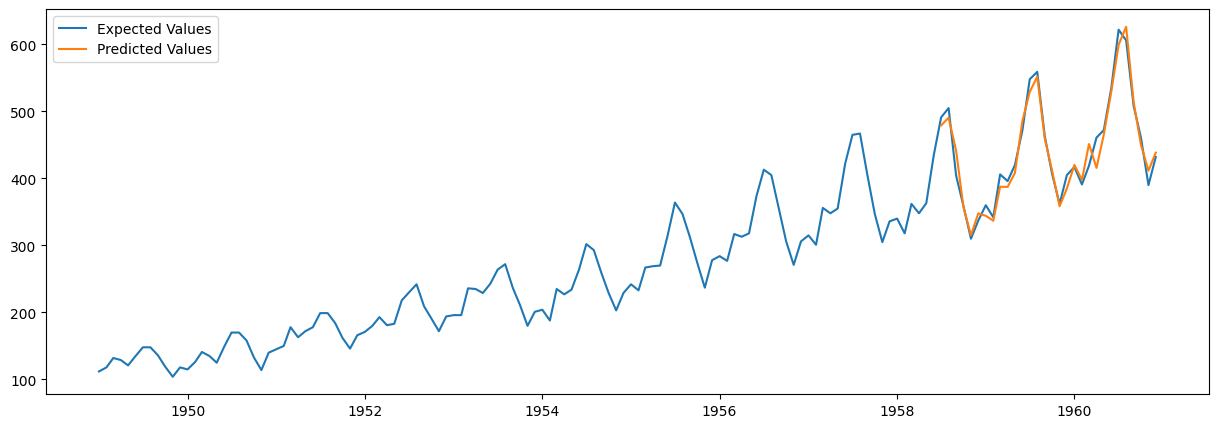

In [29]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(data['Passengers'],label = 'Expected Values')
plt.plot(predictions_series,label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [30]:
error = np.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.4f' % error)

Test RMSE: 16.9253


In [31]:
forecast['SARIMA_Forecast_Function'] = np.NaN
forecast['SARIMA_Predict_Function'] = np.NaN
forecast.head()

NameError: name 'forecast' is not defined